## Problem Statement

This project was done to solve an emerging problem for a big online platform committed to delivering customized loan products to millennials.

They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at this firm is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

This firm deploys formal credit to salaried individuals and businesses 4 main financial instruments:
* Personal Loan
* EMI Free Loan
* Personal Overdraft
* Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only.

Based on the given data I as a Data Scientist have to build and deploy a model that wil help the firm to figure out if a credit line should be extended to a customer or not. And if it should be extended then what should be the terms of the credit.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns
from prettytable import PrettyTable

from category_encoders import TargetEncoder

pd.set_option('display.max_columns', None)

In [ ]:
loan_data = pd.read_csv("loantap.csv")
# loan_data.head()

## Missing Values

In [99]:
from table2ascii import table2ascii

body_list = []

for col in loan_data.columns:
    missing_val = loan_data[col].isna().sum()
    if missing_val > 0:
        body_list.append([col, missing_val])


output = table2ascii(
    header=["Column Name", "Missing Values Sum"],
    body=body_list)

print(output)

╔═══════════════════════════════════════════╗
║     Column Name        Missing Values Sum ║
╟───────────────────────────────────────────╢
║      emp_title                1169        ║
║      emp_length               945         ║
║        title                   83         ║
║      revol_util                12         ║
║ initial_list_status            1          ║
║   application_type             1          ║
║       mort_acc                1863        ║
║ pub_rec_bankruptcies           30         ║
║       address                  1          ║
╚═══════════════════════════════════════════╝


In [100]:
x = PrettyTable()
x.field_names = ["Column Name", "Missing Values Sum"]
missing_vals_cols = []

for col in loan_data.columns:
    missing_val = loan_data[col].isna().sum()
    if missing_val > 0:
        x.add_row([col, missing_val])
        missing_vals_cols.append(col)

print(x)

+----------------------+--------------------+
|     Column Name      | Missing Values Sum |
+----------------------+--------------------+
|      emp_title       |        1169        |
|      emp_length      |        945         |
|        title         |         83         |
|      revol_util      |         12         |
| initial_list_status  |         1          |
|   application_type   |         1          |
|       mort_acc       |        1863        |
| pub_rec_bankruptcies |         30         |
|       address        |         1          |
+----------------------+--------------------+


There are missing are values in the following columns.
* emp_title
* emp_length
* title
* revol_util
* initial_list_status
* mort_acc
* pub_rec_bankruptcies
* address

We will decide what to do with these columns after further processing.

In [101]:
missing_vals_cols

['emp_title',
 'emp_length',
 'title',
 'revol_util',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'pub_rec_bankruptcies',
 'address']

In [102]:
# loan_data.fillna(0, inplace=True)
for col in missing_vals_cols:
    if col == "revol_util":
        loan_data[col].fillna(loan_data[col].mean(), inplace=True)
    else:
        loan_data[col].fillna(loan_data[[col]].mode().loc[0].values[0], inplace=True)

In [88]:
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [104]:
x = PrettyTable()
x.field_names = ["Column Name", "Missing Values Sum"]

for col in loan_data.columns:
    missing_val = loan_data[col].isna().sum()
    if missing_val > 0:
        x.add_row([col, missing_val])

print(x)

+-------------+--------------------+
| Column Name | Missing Values Sum |
+-------------+--------------------+
+-------------+--------------------+


In [105]:
body_list = []

for col in loan_data.columns:
    missing_val = loan_data[col].isna().sum()
    if missing_val > 0:
        body_list.append([col, missing_val])

output = table2ascii(
    header=["Column Name", "Missing Values Sum"],
    body=body_list)

print(output)

╔══════════════════════════════════╗
║ Column Name   Missing Values Sum ║
╟──────────────────────────────────╢
╚══════════════════════════════════╝


All the missing values have been filled based on their respective data types.

## Feature Engineering

## Extracting features from Address

Extracting more features form **Address** such as **place**, **state**, **pin_code**

In [106]:
def extract_address_information(row):
    if row["address"] == None:
        row["place"], row["some_abbr"], row["pin_code"] = None, None, None
        return row
    
    row_addr = row["address"]

    row_data = row_addr.split("\r\n")[-1]

    row_data = row_data.split(", ")
    
    row["place"] = row_data[0]
    
    row_data = row_data[-1]
    row_data = row_data.split(" ")
    
    row["some_abbr"] = row_data[0]
    
    row["pin_code"] = row_data[-1]

    return row

In [ ]:
loan_data = loan_data.apply(extract_address_information, axis=1)
# loan_data.head()

In [3]:
# loan_data.describe()

In [110]:
loan_data[["loan_status"]].value_counts()

loan_status
Fully Paid     16501
Charged Off     3982
dtype: int64

Converting the below mentioned features into boolean data types to contain values 0, 1

In [111]:
loan_data["pub_rec"].value_counts()

0.0     17471
1.0      2612
2.0       259
3.0        83
4.0        30
5.0        15
6.0         5
8.0         4
9.0         1
10.0        1
11.0        1
7.0         1
Name: pub_rec, dtype: int64

In [112]:
loan_data["mort_acc"].value_counts()

0.0     9248
1.0     3141
2.0     2587
3.0     1927
4.0     1415
5.0      924
6.0      603
7.0      303
8.0      159
9.0       87
10.0      44
11.0      16
12.0      15
14.0       4
13.0       3
15.0       2
19.0       2
22.0       1
34.0       1
25.0       1
Name: mort_acc, dtype: int64

In [113]:
loan_data["pub_rec_bankruptcies"].value_counts()

0.0    18133
1.0     2246
2.0       82
3.0       14
4.0        6
5.0        2
Name: pub_rec_bankruptcies, dtype: int64

In [ ]:
# loan_data_rep = loan_data.replace({'loan_status' : { 'Fully Paid' : 1, 'Charged Off' : 0}})
loan_data["loan_status_int"] = loan_data['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)
loan_data['pub_rec_flag'] = loan_data['pub_rec'].apply(lambda x: 1 if x > 0 else 0)
loan_data['mort_acc_flag'] = loan_data['mort_acc'].apply(lambda x: 1 if x > 0 else 0)
loan_data['pub_rec_bankruptcies_flag'] = loan_data['pub_rec_bankruptcies'].apply(lambda x: 1 if x > 0 else 0)
# loan_data.head()

## Correlation Map

In [116]:
loan_data.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_status_int,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag
loan_amnt,1.000000,0.170316,0.954408,0.310743,0.034441,0.181518,-0.074932,0.345148,0.094128,0.208868,0.236569,-0.105650,-0.058497,-0.103158,0.227783,-0.111774
int_rate,0.170316,1.000000,0.163108,-0.051408,0.187512,0.012053,0.067310,-0.005725,0.300361,-0.039008,-0.047878,0.065456,-0.244788,0.074604,-0.036057,0.063945
installment,0.954408,0.163108,1.000000,0.304948,0.030270,0.171901,-0.060770,0.333001,0.115256,0.186908,0.217088,-0.094616,-0.038852,-0.089730,0.206367,-0.100152
annual_inc,0.310743,-0.051408,0.304948,1.000000,-0.171364,0.113371,-0.017459,0.286687,0.035455,0.168257,0.210220,-0.046892,0.050677,-0.032364,0.185188,-0.048649
dti,0.034441,0.187512,0.030270,-0.171364,1.000000,0.307048,-0.035037,0.146270,0.189077,0.229003,-0.006426,-0.026444,-0.132639,-0.038679,0.025211,-0.029290
open_acc,0.181518,0.012053,0.171901,0.113371,0.307048,1.000000,-0.017712,0.236403,-0.128518,0.675346,0.133871,-0.033526,-0.021980,-0.026526,0.149111,-0.034504
pub_rec,-0.074932,0.067310,-0.060770,-0.017459,-0.035037,-0.017712,1.000000,-0.118680,-0.091282,0.021283,0.027668,0.717511,-0.022618,0.842812,0.064011,0.682390
revol_bal,0.345148,-0.005725,0.333001,0.286687,0.146270,0.236403,-0.118680,1.000000,0.253559,0.206266,0.210520,-0.135554,0.013890,-0.140717,0.175822,-0.139782
revol_util,0.094128,0.300361,0.115256,0.035455,0.189077,-0.128518,-0.091282,0.253559,1.000000,-0.102076,0.025145,-0.092900,-0.088610,-0.097000,0.028882,-0.090852
total_acc,0.208868,-0.039008,0.186908,0.168257,0.229003,0.675346,0.021283,0.206266,-0.102076,1.000000,0.378905,0.039978,0.022511,0.029642,0.308969,0.040157


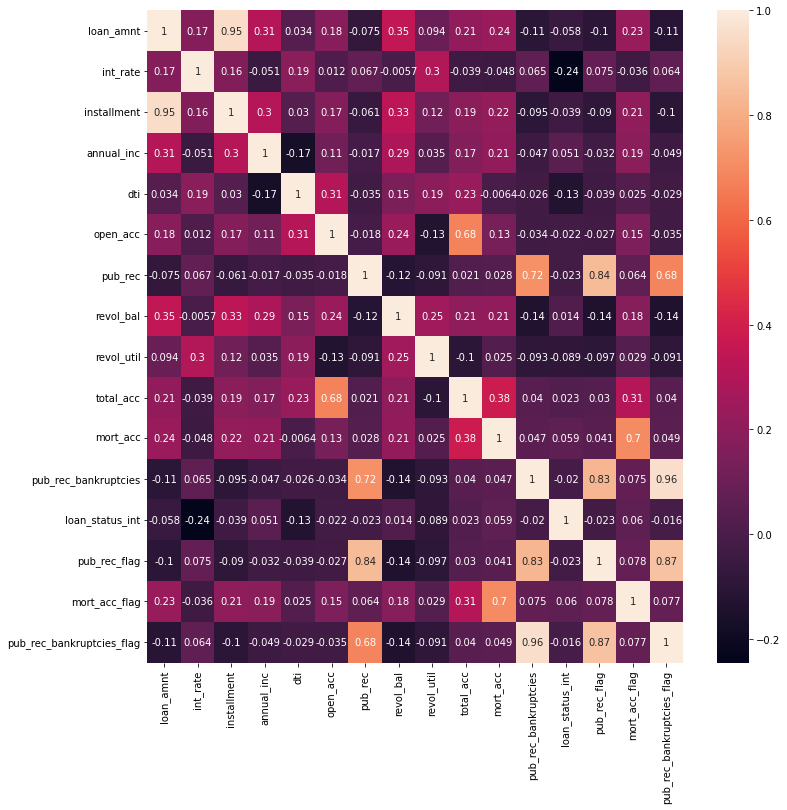

In [117]:
mp.figure(figsize=(12,12))
ax = sns.heatmap(loan_data.corr(), annot=True)

The **loan_status** is not significantly but somewhat negatively correlated with the **interest rate**.

## Duplicate Values

In [118]:
loan_data.duplicated().sum()

0

There are no duplicated values.

## Outliers Detection and Removal

In [120]:
loan_data.dtypes

loan_amnt                    float64
term                          object
int_rate                     float64
installment                  float64
grade                         object
sub_grade                     object
emp_title                     object
emp_length                    object
home_ownership                object
annual_inc                   float64
verification_status           object
issue_d                       object
loan_status                   object
purpose                       object
title                         object
dti                          float64
earliest_cr_line              object
open_acc                     float64
pub_rec                      float64
revol_bal                    float64
revol_util                   float64
total_acc                    float64
initial_list_status           object
application_type              object
mort_acc                     float64
pub_rec_bankruptcies         float64
address                       object
p

In [121]:
ctg_cols = ["grade", "sub_grade", "emp_length", "home_ownership", "verification_status", "purpose", "application_type"]
loan_data[ctg_cols] = loan_data[ctg_cols].astype('category')

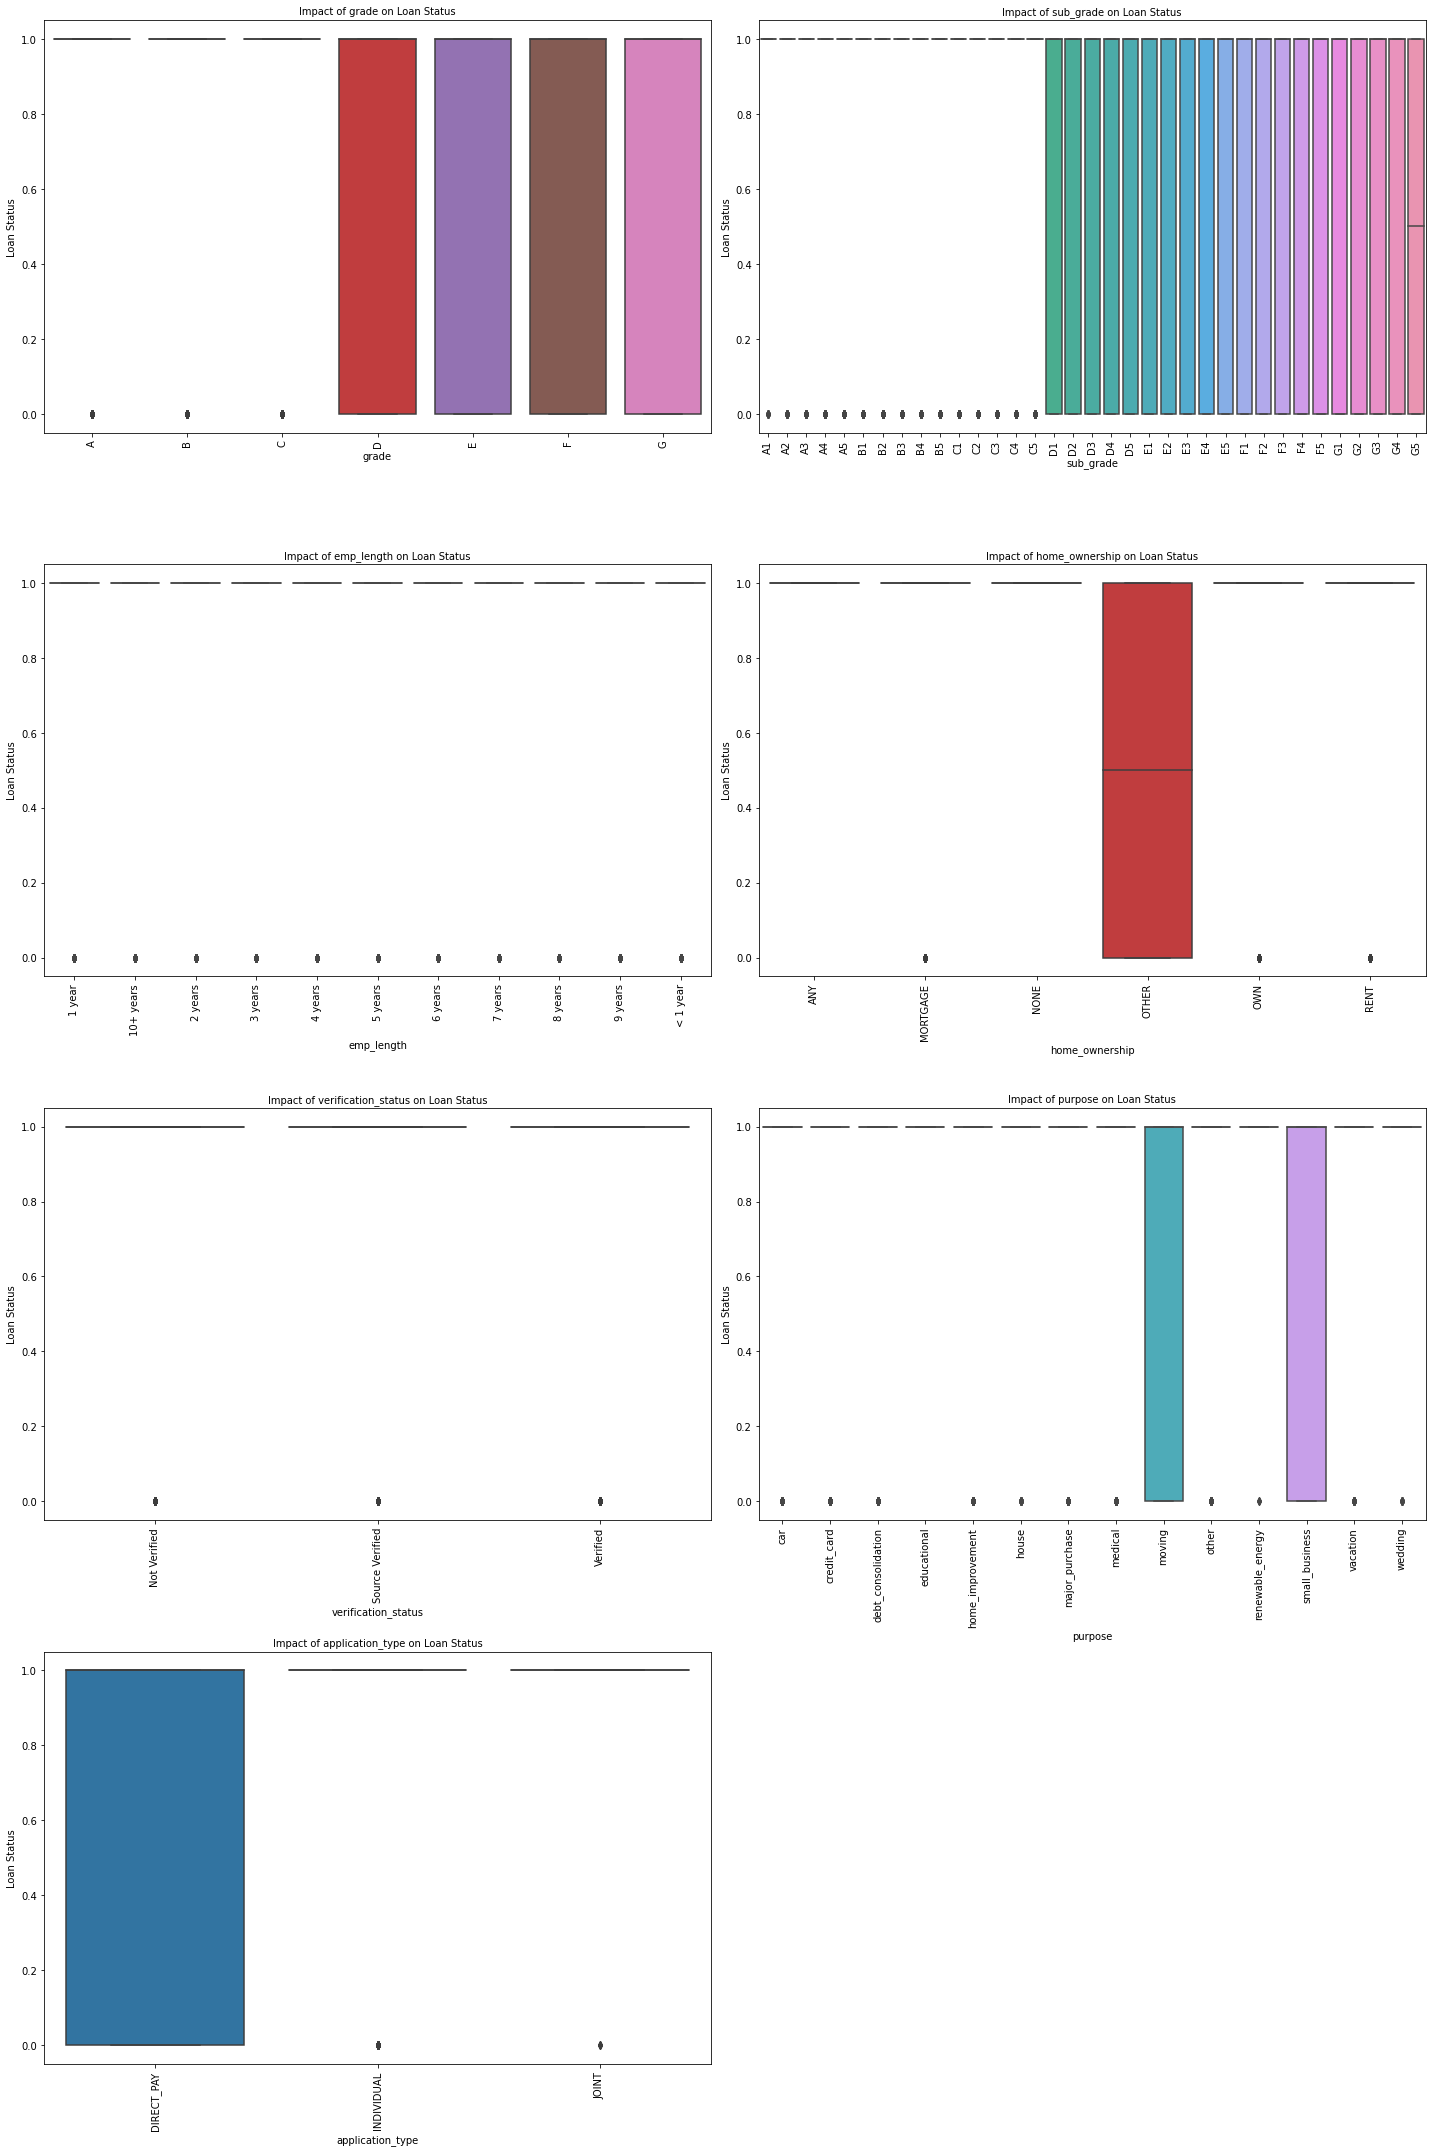

In [122]:
# Boxplots to analyse the relationship between categorical variables and Chance of Admit

cat_cols = loan_data.select_dtypes(include=['bool','category']).columns.tolist()
# print(cat_cols)

mp.figure(figsize=(20, 30))
i=1
for col in cat_cols:
    ax = mp.subplot(4,2,i)
    sns.boxplot(data = loan_data, x=col, y='loan_status_int')
    mp.title(f"Impact of {col} on Loan Status", fontsize=10)
    mp.xlabel(col)
    mp.xticks(rotation = 90)
    mp.ylabel('Loan Status')
    i+=1

mp.tight_layout()
mp.show();

There are many outliers in the above categorical variables.

These outliers might not actually be outliers since there is a clear imbalance between the Loan Status values.

### Drop Columns

In [129]:
loan_data.drop(["address", "loan_status", "pub_rec", "mort_acc", "pub_rec_bankruptcies"], axis = 1, inplace = True)

## Encoding columns (Target Encoding)

In [170]:
encode_cols = ["grade",
               "sub_grade",
               "emp_title",
               "emp_length",
               "home_ownership",
               "verification_status",
               "issue_d",
               "purpose",
               "title",
               "application_type",
               "place", "some_abbr", "pin_code",
               "earliest_cr_line"]

In [171]:
loan_data[encode_cols].head()

,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,title,application_type,place,some_abbr,pin_code,earliest_cr_line
0,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,vacation,Vacation,INDIVIDUAL,Mendozaberg,OK,22690,Jun-1990
1,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,debt_consolidation,Debt consolidation,INDIVIDUAL,Loganmouth,SD,05113,Jul-2004
2,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,credit_card,Credit card refinancing,INDIVIDUAL,New Sabrina,WV,05113,Aug-2007
3,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,credit_card,Credit card refinancing,INDIVIDUAL,Delacruzside,MA,00813,Sep-2006
4,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,credit_card,Credit Card Refinance,INDIVIDUAL,Greggshire,VA,11650,Mar-1999


In [ ]:
loan_data.replace({'term' : {' 36 months' : 36, ' 60 months' : 60}}, inplace = True)
# loan_data.head()

In [174]:
encode_cols

['grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'title',
 'application_type',
 'place',
 'some_abbr',
 'pin_code',
 'earliest_cr_line']

In [ ]:
targetEncoder = TargetEncoder()
loan_data[encode_cols] = targetEncoder.fit_transform(loan_data[encode_cols], loan_data["loan_status_int"])
# loan_data.head()

In [184]:
loan_data.replace({'initial_list_status' : {'w' : 1, 'f' : 0}}, inplace = True)

## Train Test Split

In [186]:
from sklearn.model_selection import train_test_split

In [203]:
X = loan_data.drop(['loan_status_int'], axis=1)
Y = loan_data[['loan_status_int']]

In [204]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

## Scaling the data

In [178]:
from sklearn.preprocessing import MinMaxScaler

In [205]:
min_max_scaler_x = MinMaxScaler()

min_max_scaler_y = MinMaxScaler()

In [207]:
min_max_scaler_x.fit(X_train)

min_max_scaler_y.fit(Y_train.values.reshape(-1, 1))

MinMaxScaler()

In [209]:
# loan_data.columns
feature_cols = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'title', 'dti',
       'earliest_cr_line', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'place', 'some_abbr',
       'pin_code', 'pub_rec_flag', 'mort_acc_flag',
       'pub_rec_bankruptcies_flag']

target_col = ['loan_status_int']

In [210]:
X_train_scaled = pd.DataFrame(min_max_scaler_x.transform(X_train), columns = feature_cols)
X_test_scaled = pd.DataFrame(min_max_scaler_x.transform(X_test), columns = feature_cols)

In [211]:
Y_train_scaled = pd.DataFrame(min_max_scaler_y.transform(Y_train), columns = target_col)
Y_test_scaled = pd.DataFrame(min_max_scaler_y.transform(Y_test), columns = target_col)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


## Model Creation

In [125]:
from sklearn.linear_model import LogisticRegression

In [212]:
model = LogisticRegression()
model.fit(X_train_scaled, Y_train_scaled)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.predict_proba()

In [213]:
model.score(X_test_scaled, Y_test_scaled)

0.974613506916192

The model has an accuracy of 97%

In [231]:
Y_pred = model.predict(X_test_scaled)

In [220]:
Y_pred_prob = model.predict_proba(X_test_scaled)[::,1]
Y_pred_prob

array([0.00355626, 0.9813005 , 0.9988279 , ..., 0.99635368, 0.75926683,
       0.99939439])

In [219]:
Y_pred_prob

array([[9.96443740e-01, 3.55625997e-03],
       [1.86994994e-02, 9.81300501e-01],
       [1.17209819e-03, 9.98827902e-01],
       ...,
       [3.64632456e-03, 9.96353675e-01],
       [2.40733174e-01, 7.59266826e-01],
       [6.05611777e-04, 9.99394388e-01]])

## Classification Report

In [229]:
from sklearn.metrics import classification_report

In [232]:
target_names = ['loan approved', 'loan disapproved']
print(classification_report(Y_test_scaled, Y_pred, target_names=target_names))

                  precision    recall  f1-score   support

   loan approved       0.95      0.91      0.93      1173
loan disapproved       0.98      0.99      0.98      4972

        accuracy                           0.97      6145
       macro avg       0.97      0.95      0.96      6145
    weighted avg       0.97      0.97      0.97      6145



The model has a good precision, recall and f1-score and thus we can go ahead with this model.

## Confusion Matrix

In [234]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(Y_test_scaled, Y_pred)
cnf_matrix

array([[1070,  103],
       [  53, 4919]], dtype=int64)

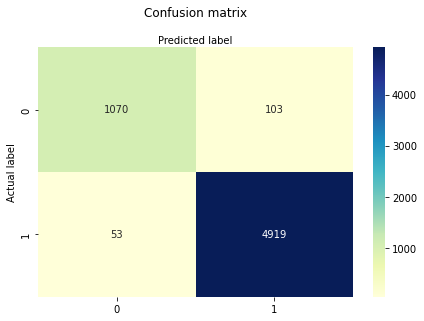

In [236]:
class_names=[0,1] # name  of classes
fig, ax = mp.subplots()
tick_marks = np.arange(len(class_names))
mp.xticks(tick_marks, class_names)
mp.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
mp.tight_layout()
mp.title('Confusion matrix', y=1.1)
mp.ylabel('Actual label')
mp.xlabel('Predicted label')

mp.Text(0.5,257.44,'Predicted label');

The True Negatives and True Positives are much higher than the False Positives and False Negatives.

## ROC AUC Curve

In [226]:
from sklearn.metrics import roc_auc_score

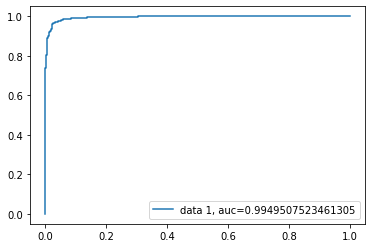

In [228]:
fpr, tpr, thresholds = roc_curve(Y_test_scaled, Y_pred_prob)

auc = roc_auc_score(Y_test_scaled, Y_pred_prob)
mp.plot(fpr,tpr,label="data 1, auc="+str(auc))
mp.legend(loc=4)
mp.show()

This is the best model for the given task of identifying if the credit line should be extended to the customer given all their details or not.

## Insights and Recommendations

### Insights
* There were a lot of missing values which had to be filled with the given data which makes the data overall slightly unreliable.
* The loan_status is not significantly but somewhat negatively correlated with the interest rate.

### Recommendations
More details regarding the customer could have been mentioned such as:-
* Age
* Credit Score
* CIBIL Score
etc.

This might have made the model more accurate in terms of the prediction and metrics.

<div style='text-align: right;'>
  <b>Analysis performed by - Deep Doshi<b>
</div>
      <br>
<div style='text-align: right;'>
  <b>Last updated on - 08/10/2023<b>
</div>